Imports

In [104]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt


# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"



Prepare DATASET

In [105]:

train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/test",
                                          target_size=(32,32),
                                          batch_size = 1,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/train",
                                          target_size=(32,32),
                                          batch_size =1,
                                          class_mode = 'binary',)

test_dataset.class_indices

Found 400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


{'SNGAN_bicubic': 0, 'imagewoof': 1}

Design Model

In [125]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for fake or 1 for real 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))


model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Training

In [136]:
history = model.fit(train_dataset,
         steps_per_epoch = 80,
         epochs = 15,
         validation_data = test_dataset
         )

Epoch 1/15
80/80 [==============================] - 5s 64ms/step - loss: 0.1462 - accuracy: 0.9500 - val_loss: 0.6403 - val_accuracy: 0.7587
Epoch 2/15
80/80 [==============================] - 5s 63ms/step - loss: 0.1707 - accuracy: 0.9375 - val_loss: 0.6396 - val_accuracy: 0.7994
Epoch 3/15
80/80 [==============================] - 5s 63ms/step - loss: 0.2429 - accuracy: 0.8750 - val_loss: 0.5926 - val_accuracy: 0.7981
Epoch 4/15
80/80 [==============================] - 5s 63ms/step - loss: 0.2568 - accuracy: 0.8625 - val_loss: 0.6791 - val_accuracy: 0.7831
Epoch 5/15
80/80 [==============================] - 5s 63ms/step - loss: 0.1845 - accuracy: 0.9375 - val_loss: 0.6981 - val_accuracy: 0.7487
Epoch 6/15
80/80 [==============================] - 5s 63ms/step - loss: 0.2518 - accuracy: 0.9000 - val_loss: 0.6508 - val_accuracy: 0.7925
Epoch 7/15
80/80 [==============================] - 5s 63ms/step - loss: 0.1715 - accuracy: 0.9250 - val_loss: 0.5840 - val_accuracy: 0.7844
Epoch 8/15
80

Prediction

[[1.]]


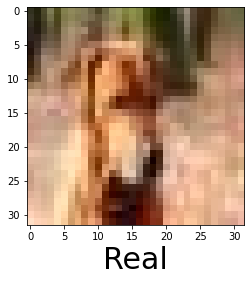

In [137]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(32,32))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("Real",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("Fake",fontsize=30)

predictImage(r"/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/test/imagewoof_test/985.jpg")


[[0.]]


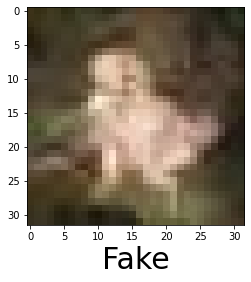

In [140]:

predictImage(r"/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/test/SNGAN_bicubic_test/955.jpg")